<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Loading the Data***

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')

In [ ]:
df.shape

(920, 21)

In [ ]:
#df.head()

### ***Preprocessing***

In [ ]:
df=df.set_index('Which year are you in?')

In [ ]:
df=df.drop(df.iloc[:, [0,19]],axis=1)

In [ ]:
#df.head(1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df1=df.drop(df.iloc[:, [2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
df2=df.drop(df.iloc[:, [0,1,3,7,17]],axis=1)

In [ ]:
#df1.head(1)

In [ ]:
#df2.head(1)

In [ ]:
encode=df2.apply(le.fit_transform)
#encode.head(1)

In [ ]:
df3=pd.concat([df1,encode],axis=1)
#df3.head()

In [ ]:
dummy=pd.get_dummies(df3['How are you feeling right now?'])
df4=pd.concat([df3,dummy],axis=1)
df4=df4.drop(['How are you feeling right now?'],axis=1)
#df4.head()

### ***Finding the Correlation***

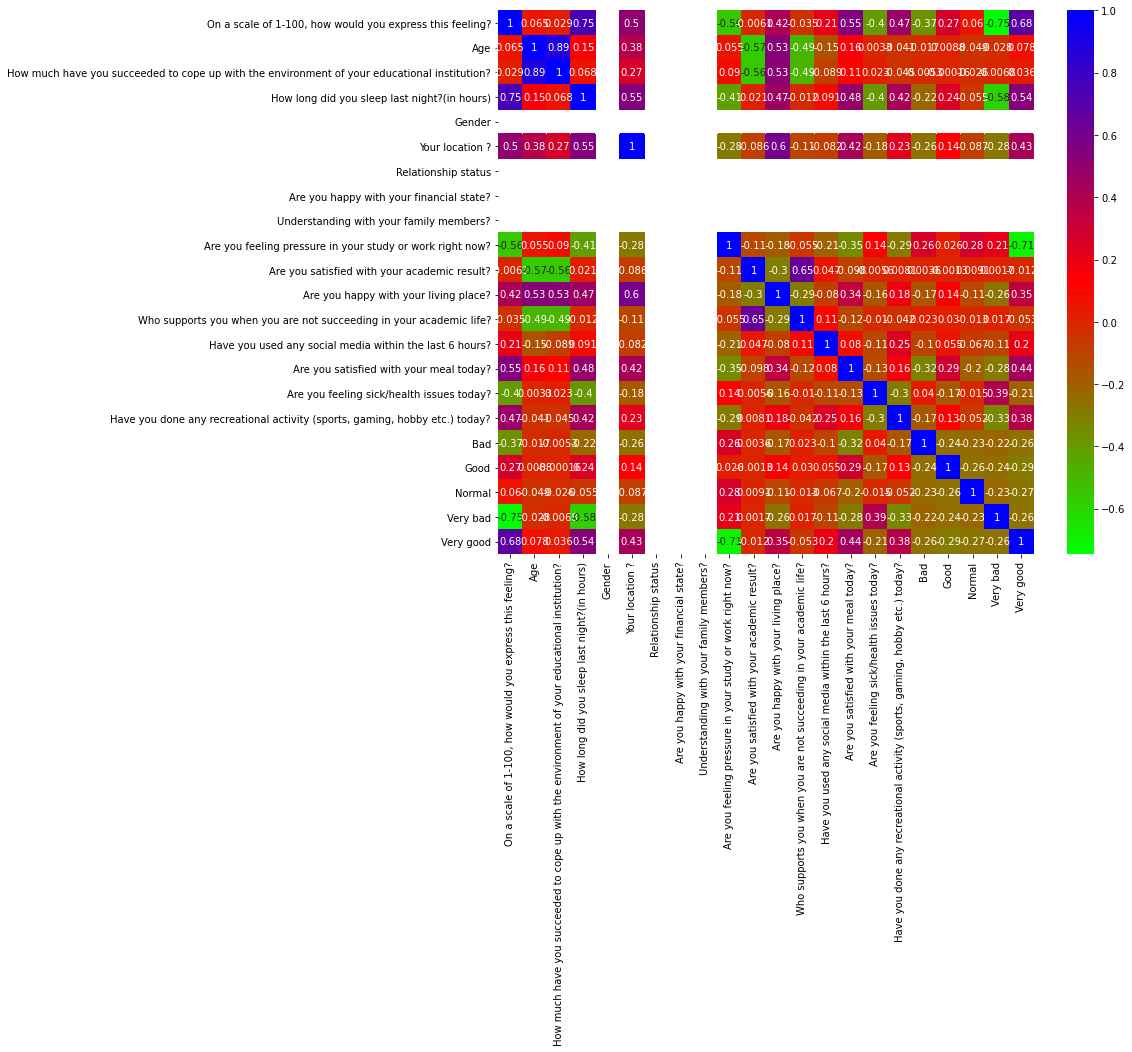

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df4.corr(),annot=True,cmap=plt.cm.brg_r)
plt.show()

### ***Implementation and Training***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
X=df4.drop(df4.iloc[:, [1,2,4,6,7,8,17,18,19,20,21]],axis=1).values
y=df4.iloc[:, [17,18,19,20,21]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
gpu=tf.config.list_physical_devices("GPU")
gpu

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/CSE_LAB",histogram_freq=1)

model.compile(tf.compat.v1.train.AdamOptimizer(
    learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=10e-08, use_locking=False,
    name='Adam'),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=700,callbacks=[tb_callback],validation_data=(X_val,y_val))

Epoch 1/700
24/24 [==============================] - 1s 9ms/step - loss: 1.7629 - accuracy: 0.1356 - val_loss: 1.7721 - val_accuracy: 0.1566
Epoch 2/700
24/24 [==============================] - 0s 3ms/step - loss: 1.7508 - accuracy: 0.1383 - val_loss: 1.7603 - val_accuracy: 0.1325
Epoch 3/700
24/24 [==============================] - 0s 3ms/step - loss: 1.7395 - accuracy: 0.1221 - val_loss: 1.7495 - val_accuracy: 0.1084
Epoch 4/700
24/24 [==============================] - 0s 3ms/step - loss: 1.7289 - accuracy: 0.1208 - val_loss: 1.7392 - val_accuracy: 0.0964
Epoch 5/700
24/24 [==============================] - 0s 3ms/step - loss: 1.7189 - accuracy: 0.1356 - val_loss: 1.7292 - val_accuracy: 0.1205
Epoch 6/700
24/24 [==============================] - 0s 3ms/step - loss: 1.7094 - accuracy: 0.1490 - val_loss: 1.7197 - val_accuracy: 0.1205
Epoch 7/700
24/24 [==============================] - 0s 3ms/step - loss: 1.7002 - accuracy: 0.1248 - val_loss: 1.7106 - val_accuracy: 0.0723
Epoch 8/700
2

Epoch 59/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3409 - accuracy: 0.4510 - val_loss: 1.3351 - val_accuracy: 0.4458
Epoch 60/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3338 - accuracy: 0.4510 - val_loss: 1.3279 - val_accuracy: 0.4458
Epoch 61/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3265 - accuracy: 0.4497 - val_loss: 1.3210 - val_accuracy: 0.4458
Epoch 62/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3193 - accuracy: 0.4470 - val_loss: 1.3141 - val_accuracy: 0.4458
Epoch 63/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3121 - accuracy: 0.4443 - val_loss: 1.3067 - val_accuracy: 0.4337
Epoch 64/700
24/24 [==============================] - 0s 3ms/step - loss: 1.3045 - accuracy: 0.4443 - val_loss: 1.2997 - val_accuracy: 0.4337
Epoch 65/700
24/24 [==============================] - 0s 3ms/step - loss: 1.2974 - accuracy: 0.4456 - val_loss: 1.2923 - val_accuracy: 0.4337
Epoch 

24/24 [==============================] - 0s 3ms/step - loss: 1.0177 - accuracy: 0.5356 - val_loss: 1.0152 - val_accuracy: 0.5422
Epoch 117/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0136 - accuracy: 0.5396 - val_loss: 1.0110 - val_accuracy: 0.5422
Epoch 118/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0097 - accuracy: 0.5396 - val_loss: 1.0068 - val_accuracy: 0.5542
Epoch 119/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0056 - accuracy: 0.5436 - val_loss: 1.0028 - val_accuracy: 0.5422
Epoch 120/700
24/24 [==============================] - 0s 3ms/step - loss: 1.0016 - accuracy: 0.5450 - val_loss: 0.9986 - val_accuracy: 0.5542
Epoch 121/700
24/24 [==============================] - 0s 3ms/step - loss: 0.9975 - accuracy: 0.5517 - val_loss: 0.9945 - val_accuracy: 0.5542
Epoch 122/700
24/24 [==============================] - 0s 3ms/step - loss: 0.9935 - accuracy: 0.5544 - val_loss: 0.9904 - val_accuracy: 0.5422
Epoch 123/700

24/24 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.6819 - val_loss: 0.8201 - val_accuracy: 0.6386
Epoch 174/700
24/24 [==============================] - 0s 3ms/step - loss: 0.8102 - accuracy: 0.6872 - val_loss: 0.8175 - val_accuracy: 0.6386
Epoch 175/700
24/24 [==============================] - 0s 3ms/step - loss: 0.8071 - accuracy: 0.6899 - val_loss: 0.8150 - val_accuracy: 0.6386
Epoch 176/700
24/24 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.6899 - val_loss: 0.8124 - val_accuracy: 0.6386
Epoch 177/700
24/24 [==============================] - 0s 3ms/step - loss: 0.8010 - accuracy: 0.6913 - val_loss: 0.8097 - val_accuracy: 0.6386
Epoch 178/700
24/24 [==============================] - 0s 3ms/step - loss: 0.7979 - accuracy: 0.6899 - val_loss: 0.8071 - val_accuracy: 0.6386
Epoch 179/700
24/24 [==============================] - 0s 3ms/step - loss: 0.7948 - accuracy: 0.6926 - val_loss: 0.8045 - val_accuracy: 0.6627
Epoch 180/700

24/24 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.7758 - val_loss: 0.6894 - val_accuracy: 0.7349
Epoch 231/700
24/24 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.7732 - val_loss: 0.6875 - val_accuracy: 0.7349
Epoch 232/700
24/24 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.7772 - val_loss: 0.6856 - val_accuracy: 0.7349
Epoch 233/700
24/24 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.7812 - val_loss: 0.6837 - val_accuracy: 0.7349
Epoch 234/700
24/24 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.7799 - val_loss: 0.6816 - val_accuracy: 0.7349
Epoch 235/700
24/24 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.7826 - val_loss: 0.6798 - val_accuracy: 0.7590
Epoch 236/700
24/24 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.7839 - val_loss: 0.6778 - val_accuracy: 0.7590
Epoch 237/700

24/24 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.8376 - val_loss: 0.5883 - val_accuracy: 0.8072
Epoch 288/700
24/24 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.8376 - val_loss: 0.5866 - val_accuracy: 0.8072
Epoch 289/700
24/24 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.8389 - val_loss: 0.5849 - val_accuracy: 0.8072
Epoch 290/700
24/24 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.8403 - val_loss: 0.5834 - val_accuracy: 0.8072
Epoch 291/700
24/24 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.8403 - val_loss: 0.5818 - val_accuracy: 0.8072
Epoch 292/700
24/24 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.8416 - val_loss: 0.5803 - val_accuracy: 0.8072
Epoch 293/700
24/24 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.8416 - val_loss: 0.5786 - val_accuracy: 0.8072
Epoch 294/700

24/24 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8765 - val_loss: 0.5002 - val_accuracy: 0.8313
Epoch 345/700
24/24 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8765 - val_loss: 0.4988 - val_accuracy: 0.8313
Epoch 346/700
24/24 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.8765 - val_loss: 0.4972 - val_accuracy: 0.8313
Epoch 347/700
24/24 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8765 - val_loss: 0.4954 - val_accuracy: 0.8313
Epoch 348/700
24/24 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8779 - val_loss: 0.4940 - val_accuracy: 0.8313
Epoch 349/700
24/24 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8779 - val_loss: 0.4925 - val_accuracy: 0.8313
Epoch 350/700
24/24 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8779 - val_loss: 0.4910 - val_accuracy: 0.8313
Epoch 351/700

24/24 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.9007 - val_loss: 0.4211 - val_accuracy: 0.8434
Epoch 402/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.9020 - val_loss: 0.4197 - val_accuracy: 0.8434
Epoch 403/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.9020 - val_loss: 0.4182 - val_accuracy: 0.8554
Epoch 404/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.9020 - val_loss: 0.4168 - val_accuracy: 0.8554
Epoch 405/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.9020 - val_loss: 0.4157 - val_accuracy: 0.8554
Epoch 406/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3641 - accuracy: 0.9020 - val_loss: 0.4143 - val_accuracy: 0.8554
Epoch 407/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.9020 - val_loss: 0.4131 - val_accuracy: 0.8554
Epoch 408/700

24/24 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.9168 - val_loss: 0.3548 - val_accuracy: 0.8795
Epoch 459/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.9181 - val_loss: 0.3535 - val_accuracy: 0.8795
Epoch 460/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.9181 - val_loss: 0.3528 - val_accuracy: 0.8795
Epoch 461/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.9168 - val_loss: 0.3518 - val_accuracy: 0.8795
Epoch 462/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.9181 - val_loss: 0.3503 - val_accuracy: 0.8795
Epoch 463/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.9181 - val_loss: 0.3493 - val_accuracy: 0.8795
Epoch 464/700
24/24 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9181 - val_loss: 0.3479 - val_accuracy: 0.8795
Epoch 465/700

24/24 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.9248 - val_loss: 0.2990 - val_accuracy: 0.9157
Epoch 516/700
24/24 [==============================] - 0s 4ms/step - loss: 0.2623 - accuracy: 0.9248 - val_loss: 0.2981 - val_accuracy: 0.9157
Epoch 517/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.9248 - val_loss: 0.2973 - val_accuracy: 0.9157
Epoch 518/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.9248 - val_loss: 0.2964 - val_accuracy: 0.9157
Epoch 519/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2600 - accuracy: 0.9248 - val_loss: 0.2955 - val_accuracy: 0.9157
Epoch 520/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.9248 - val_loss: 0.2946 - val_accuracy: 0.9157
Epoch 521/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.9248 - val_loss: 0.2938 - val_accuracy: 0.9157
Epoch 522/700

24/24 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.9289 - val_loss: 0.2527 - val_accuracy: 0.9277
Epoch 573/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9289 - val_loss: 0.2521 - val_accuracy: 0.9277
Epoch 574/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9289 - val_loss: 0.2513 - val_accuracy: 0.9277
Epoch 575/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2509 - val_accuracy: 0.9277
Epoch 576/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9289 - val_loss: 0.2500 - val_accuracy: 0.9277
Epoch 577/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9329 - val_loss: 0.2496 - val_accuracy: 0.9277
Epoch 578/700
24/24 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9342 - val_loss: 0.2487 - val_accuracy: 0.9277
Epoch 579/700

24/24 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9490 - val_loss: 0.2186 - val_accuracy: 0.9518
Epoch 630/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.9503 - val_loss: 0.2177 - val_accuracy: 0.9518
Epoch 631/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9503 - val_loss: 0.2173 - val_accuracy: 0.9518
Epoch 632/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9503 - val_loss: 0.2170 - val_accuracy: 0.9518
Epoch 633/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9503 - val_loss: 0.2164 - val_accuracy: 0.9518
Epoch 634/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9503 - val_loss: 0.2159 - val_accuracy: 0.9518
Epoch 635/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9503 - val_loss: 0.2149 - val_accuracy: 0.9518
Epoch 636/700

24/24 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9611 - val_loss: 0.1910 - val_accuracy: 0.9518
Epoch 687/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.9597 - val_loss: 0.1914 - val_accuracy: 0.9518
Epoch 688/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1602 - accuracy: 0.9611 - val_loss: 0.1907 - val_accuracy: 0.9518
Epoch 689/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1598 - accuracy: 0.9597 - val_loss: 0.1901 - val_accuracy: 0.9518
Epoch 690/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9624 - val_loss: 0.1893 - val_accuracy: 0.9518
Epoch 691/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1589 - accuracy: 0.9624 - val_loss: 0.1892 - val_accuracy: 0.9518
Epoch 692/700
24/24 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.9624 - val_loss: 0.1892 - val_accuracy: 0.9518
Epoch 693/700

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


### ***Model Evaluation***

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9674


[0.14240913093090057, 0.967391312122345]

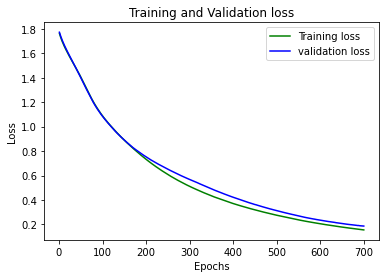

In [ ]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,701)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

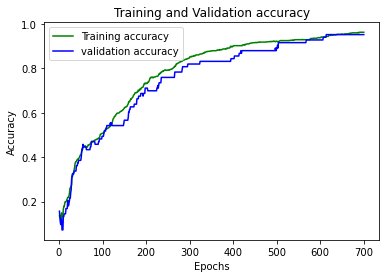

In [ ]:
loss_train=history.history['accuracy']
loss_val=history.history['val_accuracy']
epochs=range(1,701)
plt.plot(epochs,loss_train, 'g', label='Training accuracy')
plt.plot(epochs,loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/CSE_LAB/

### ***Evaluation(cont.) and Prediction***

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred=model.predict(X_test)
y_pred[0]

array([6.9828197e-02, 5.3060431e-11, 1.4657039e-06, 9.3017030e-01,
       5.2511245e-10], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_pred]
print(y_predicted_labels)

[3, 1, 1, 3, 3, 4, 0, 4, 3, 3, 3, 1, 0, 2, 4, 0, 1, 2, 4, 3, 4, 2, 4, 4, 1, 1, 4, 3, 3, 0, 2, 3, 0, 0, 2, 1, 4, 4, 1, 0, 0, 2, 2, 2, 4, 3, 0, 3, 1, 0, 1, 4, 4, 2, 0, 4, 3, 3, 4, 1, 0, 1, 4, 0, 1, 0, 2, 1, 1, 2, 2, 4, 2, 4, 2, 4, 0, 0, 2, 0, 4, 4, 0, 4, 3, 0, 3, 2, 0, 2, 2, 3]


In [ ]:
y_test_round=[np.argmax(i) for i in y_test]
print(y_test_round)

[3, 1, 1, 3, 3, 4, 0, 4, 3, 3, 3, 1, 0, 2, 4, 0, 1, 2, 4, 3, 4, 2, 4, 4, 1, 1, 4, 3, 3, 0, 1, 3, 0, 0, 2, 1, 4, 4, 1, 0, 0, 2, 2, 2, 4, 3, 0, 3, 1, 0, 1, 4, 4, 2, 0, 4, 3, 3, 4, 1, 0, 1, 4, 0, 1, 0, 2, 1, 1, 2, 2, 4, 2, 4, 2, 1, 0, 0, 2, 0, 4, 4, 0, 4, 3, 0, 3, 2, 0, 2, 1, 3]


In [ ]:
print(accuracy_score(y_test_round,y_predicted_labels))

0.967391304347826


In [ ]:
target_names=['Very Bad','Bad','Normal','Good','Very Good']
print(classification_report(y_test_round,y_predicted_labels,target_names=target_names))

              precision    recall  f1-score   support

    Very Bad       1.00      1.00      1.00        20
         Bad       1.00      0.83      0.91        18
      Normal       0.89      1.00      0.94        16
        Good       1.00      1.00      1.00        17
   Very Good       0.95      1.00      0.98        21

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



In [ ]:
model.save('cse_lab_model.h5')